# Questions
1. What is the total sales for the last month?
2. What is the average sales across all stores?
3. What is the sales on March 13, 2016?
4. When is worst week of Store C?
5. How much are the total sales from the most recent 3 months?

## <span style="color:red">Question 1</span>: What is the total sales for the last month?

1. Import the packages needed
2. Import 'store_data.csv'
3. Get a glimpse of the dataset
4. Declare 'week' column as 'datetime'
5. Create 'month' column
6. Group sales of each store by month
6. Calculate sum of all sales for each month
7. `Find the total sales for the last month on the last row`

### importing packages

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### importing dataset

In [2]:
df = pd.read_csv('store_data.csv')

In [3]:
# get a glimpse of the dataset
df.head()

,week,storeA,storeB,storeC,storeD,storeE
0,2014-05-04,2643,8257,3893,6231,1294
1,2014-05-11,6444,5736,5634,7092,2907
2,2014-05-18,9646,2552,4253,5447,4736
3,2014-05-25,5960,10740,8264,6063,949
4,2014-06-01,7412,7374,3208,3985,3023


### declare 'week' as datetime

In [4]:
# membuat copy dari df dengan nama df_month
df_copy = df.copy()
df_copy.head()

,week,storeA,storeB,storeC,storeD,storeE
0,2014-05-04,2643,8257,3893,6231,1294
1,2014-05-11,6444,5736,5634,7092,2907
2,2014-05-18,9646,2552,4253,5447,4736
3,2014-05-25,5960,10740,8264,6063,949
4,2014-06-01,7412,7374,3208,3985,3023


In [5]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
week      200 non-null object
storeA    200 non-null int64
storeB    200 non-null int64
storeC    200 non-null int64
storeD    200 non-null int64
storeE    200 non-null int64
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [6]:
# declare week sebagai datetime
df_copy['week'] = pd.to_datetime(df_copy['week'], format='%Y-%m-%d')

In [7]:
# melihat apakah kolom 'week' sudah menjadi datetime
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
week      200 non-null datetime64[ns]
storeA    200 non-null int64
storeB    200 non-null int64
storeC    200 non-null int64
storeD    200 non-null int64
storeE    200 non-null int64
dtypes: datetime64[ns](1), int64(5)
memory usage: 9.5 KB


### create 'month' column

In [8]:
# membuat kolom baru dengan nama 'month', mengganti formatnya menjadi yyyy-mm
df_copy['month'] = pd.to_datetime(df_copy['week']).dt.to_period('M')

In [9]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
week      200 non-null datetime64[ns]
storeA    200 non-null int64
storeB    200 non-null int64
storeC    200 non-null int64
storeD    200 non-null int64
storeE    200 non-null int64
month     200 non-null period[M]
dtypes: datetime64[ns](1), int64(5), period[M](1)
memory usage: 11.1 KB


In [10]:
df_copy.head()

,week,storeA,storeB,storeC,storeD,storeE,month
0,2014-05-04,2643,8257,3893,6231,1294,2014-05
1,2014-05-11,6444,5736,5634,7092,2907,2014-05
2,2014-05-18,9646,2552,4253,5447,4736,2014-05
3,2014-05-25,5960,10740,8264,6063,949,2014-05
4,2014-06-01,7412,7374,3208,3985,3023,2014-06


### group dataset based on monthly sales

In [11]:
monthly_sales = df_copy.groupby('month').sum()
monthly_sales.tail()

,storeA,storeB,storeC,storeD,storeE
month,,,,,
2017-10,32299,44731,20535,27545,9435
2017-11,29748,27601,21520,25219,6914
2017-12,40688,29151,30198,28422,8509
2018-01,21776,25648,19893,23985,11038
2018-02,25127,24595,16447,22783,7787


### find total sales

In [12]:
# untuk mendapatkan total sales:
totalsales = monthly_sales.iloc[:, 0:5].sum(axis = 1)
monthly_sales['total_sales'] = totalsales

In [13]:
# melihat bulan penjualan terakhir
monthly_sales.tail(1)

,storeA,storeB,storeC,storeD,storeE,total_sales
month,,,,,,
2018-02,25127,24595,16447,22783,7787,96739


In [14]:
# OR
last_month_sales = monthly_sales.iloc[-1, 0:5].sum()
last_month_sales

96739

In [49]:
print(
    ("\033[1m" + "ANSWER:" + "\033[0m") 
    + "The total sales of the last month is " 
    + ("\033[1m" + str(last_month_sales) + "\033[0m") + 
    " sales.")

ANSWER:The total sales of the last month is 96739 sales.


## <span style='color:red'>Question 2</span>: What is the average sales across all stores?

1. get a glimpse of the dataset
2. `calculate average sales of each store, put in 'average_sales'`|

In [15]:
df_copy.head()

,week,storeA,storeB,storeC,storeD,storeE,month
0,2014-05-04,2643,8257,3893,6231,1294,2014-05
1,2014-05-11,6444,5736,5634,7092,2907,2014-05
2,2014-05-18,9646,2552,4253,5447,4736,2014-05
3,2014-05-25,5960,10740,8264,6063,949,2014-05
4,2014-06-01,7412,7374,3208,3985,3023,2014-06


In [41]:
average_each_sales = df_copy.iloc[:, 1:6].mean(axis = 0)
average_each_sales

storeA    5865.480
storeB    6756.710
storeC    4942.105
storeD    5431.405
storeE    2580.025
dtype: float64

In [47]:
average_sales = average_each_sales.mean()
print(average_sales)

5115.1449999999995


In [48]:
print(
    ("\033[1m" + "ANSWER:" + "\033[0m") 
    + "The average sales accross all stores is " 
    + ("\033[1m" + '%.2f'%average_sales + "\033[0m") 
    + " sales")

ANSWER:The average sales accross all stores is 5115.14 sales


## <span style='color:red'>Question 3</span>: What is the sales on March 13, 2016?

1. locate 2016-03-13
2. `calculate total sales`

In [17]:
df_copy.head()

,week,storeA,storeB,storeC,storeD,storeE,month
0,2014-05-04,2643,8257,3893,6231,1294,2014-05
1,2014-05-11,6444,5736,5634,7092,2907,2014-05
2,2014-05-18,9646,2552,4253,5447,4736,2014-05
3,2014-05-25,5960,10740,8264,6063,949,2014-05
4,2014-06-01,7412,7374,3208,3985,3023,2014-06


In [18]:
df_index = df_copy.set_index('week')
df_index.head()

,storeA,storeB,storeC,storeD,storeE,month
week,,,,,,
2014-05-04,2643,8257,3893,6231,1294,2014-05
2014-05-11,6444,5736,5634,7092,2907,2014-05
2014-05-18,9646,2552,4253,5447,4736,2014-05
2014-05-25,5960,10740,8264,6063,949,2014-05
2014-06-01,7412,7374,3208,3985,3023,2014-06


In [19]:
totalsales = df_index.iloc[:, 0:5].sum(axis = 1)
df_index['total_sales'] = totalsales
df_index.head()

,storeA,storeB,storeC,storeD,storeE,month,total_sales
week,,,,,,,
2014-05-04,2643,8257,3893,6231,1294,2014-05,22318
2014-05-11,6444,5736,5634,7092,2907,2014-05,27813
2014-05-18,9646,2552,4253,5447,4736,2014-05,26634
2014-05-25,5960,10740,8264,6063,949,2014-05,31976
2014-06-01,7412,7374,3208,3985,3023,2014-06,25002


In [20]:
df_index.loc['2016-03-13', 'total_sales']

16605

In [51]:
# OR
sales_20160313 = df_index.loc['2016-03-13', 'storeA':'storeE'].sum(axis=0)
sales_20160313

16605

In [53]:
print(
    ("\033[1m" + "ANSWER:" + "\033[0m") 
    + "Sales on March 13, 2016 is " 
    + ("\033[1m" + str(sales_20160313) + "\033[0m") 
    + " sales")

ANSWER:Sales on March 13, 2016 is 16605 sales


## <span style='color:red'>Question 4</span>: When is worst week of Store C?

1. Define 'worst week.' Worst week means least sales
2. Get a quick look using line graph
3. `Find the worst week in store C`

In [22]:
df_index.head()

,storeA,storeB,storeC,storeD,storeE,month,total_sales
week,,,,,,,
2014-05-04,2643,8257,3893,6231,1294,2014-05,22318
2014-05-11,6444,5736,5634,7092,2907,2014-05,27813
2014-05-18,9646,2552,4253,5447,4736,2014-05,26634
2014-05-25,5960,10740,8264,6063,949,2014-05,31976
2014-06-01,7412,7374,3208,3985,3023,2014-06,25002


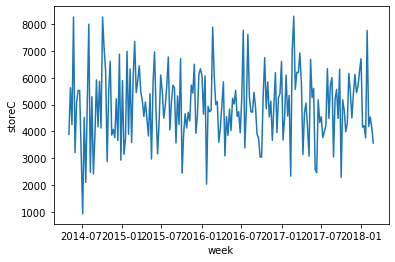

In [58]:
lineplot = sns.lineplot(x='week',
                        y='storeC',
                        data=df_copy);

In [85]:
df_storeC = df_copy.loc[:,["week","storeC"]]
df_storeC

,week,storeC
0,2014-05-04,3893
1,2014-05-11,5634
2,2014-05-18,4253
3,2014-05-25,8264
4,2014-06-01,3208
...,...,...
195,2018-01-28,7759
196,2018-02-04,4187
197,2018-02-11,4540
198,2018-02-18,4151


In [91]:
least_sales = df_storeC.sort_values(by=["storeC"]).head()
least_sales

,week,storeC
9,2014-07-06,927
90,2016-01-24,2036
11,2014-07-20,2104
178,2017-10-01,2286
145,2017-02-12,2332


In [95]:
least_sales_week =  df_storeC.sort_values(by=["storeC"]).loc[0, "week"]
print(least_sales_week)

2014-05-04 00:00:00


In [98]:
print(
    ("\033[1m" + "ANSWER:" + "\033[0m") 
    + "The worst week of Store C occured on " 
    + ("\033[1m" + str(least_sales_week) + "\033[0m")
    )

ANSWER:The worst week of Store C occured on 2014-05-04 00:00:00


## <span style='color:red'>Question 5</span>: How much are the total sales from the most recent 3 months?

1. Use 'monthly_sales'
2. `Get the sum of the last three months' sales`

In [24]:
monthly_sales.iloc[-3:,:]

,storeA,storeB,storeC,storeD,storeE,total_sales
month,,,,,,
2017-12,40688,29151,30198,28422,8509,136968
2018-01,21776,25648,19893,23985,11038,102340
2018-02,25127,24595,16447,22783,7787,96739


In [25]:
last_3month_sales = monthly_sales.iloc[-3:,5].sum(axis=0)
last_3month_sales

336047

In [59]:
print(
    ("\033[1m" + "ANSWER:" + "\033[0m") 
    + "The total sales of the last three months is " 
    + ("\033[1m" + str(last_3month_sales) + "\033[0m") 
    + " sales")

ANSWER:The total sales of the last three months is 336047 sales
